# Neural Network Project
made by KIESGEN DE RICHTER Stanislas and PRECIGOUT Gabriel.

We will Implement, from-scratch, an image classifier using the feed-forward neural
network (FFNN) using a dataset (found on moodle) consisting of 5000 images of 400 pixels. The labels correspond do the readable digit on each picture, from 0 to 9 here.

# 1. Data Preprocessing

## 1.1. Imports and Hyper Parameters
We import our libraries and data as dataframes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
pd.options.mode.chained_assignment = None  # default='warn'
learning_rate = 0.00001



## 1.2. Reading The Dataframe and Separating Features and Labels

In [ ]:
features = pd.read_csv("data/features.txt", delimiter=',')
labels = pd.read_csv("data/labels.txt")

#we rename column name of features from 0 to 399
columnNames=np.arange(0,400)

features.columns=columnNames


#their is actually no 10 but there are 0's so we set the labels 10 to 0
labels.columns=["label"]
labels["label"].replace({10: 0}, inplace=True)

df=features.copy()
df["label"]=labels.copy()

#We move labels to first column
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]


df

,label,0,1,2,3,4,5,6,7,8,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4995,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4996,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4997,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 1.3. Features Explanation
- labels correspond to the number corresponding to the image
- 0-399 correspond to the image features (pixels), we have 400 pixesl per image so 20*20 pictures

<AxesSubplot:>

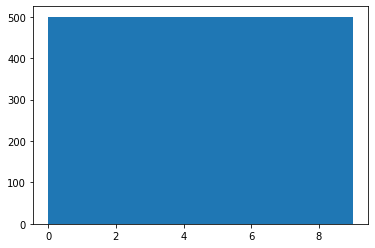

In [ ]:
df["label"].hist(grid=False)

We can see that we have 500 pictures of each digit.

Here are an exemple of each pictures:



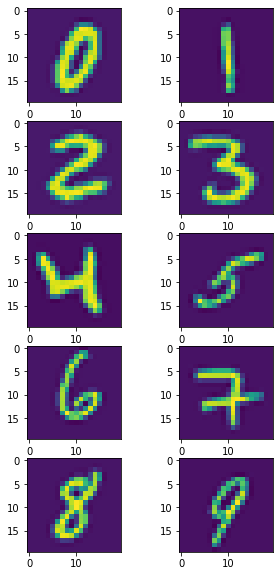

In [ ]:

fig = plt.figure(figsize=(5,10))
for i in range (0,10):
    fig.add_subplot(5, 2, i+1)
    plt.imshow(features.to_numpy()[i*500+1].reshape((20, 20)).T)  # .T is needed to have the image vertically, we transpose the matrix of the picture
plt.show()

## 1.4. Splitting data into train and test
The data is sorted so we have to shuffle it before splitting our data.

In [ ]:
#We shuffle our data
df=df.sample(frac=1)
shuffledLabels=df["label"]
shuffledFeatures=df.drop("label",axis=1)
print(shuffledFeatures)
print(shuffledLabels)

      0    1    2    3    4    5    6    7    8    9    ...       390  \
4508    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4270    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4160    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1462    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000808   
1646    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
2502    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2510    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2752    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
846     0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1019    0    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

          391       392       393       394       395  396  397  398  399  
4508  0.00000  0.000000  0.000000  0.000000  0.

We use the train_test_split method to separate our data, we name our output (Y) YtrainInt and YtestInt with the "Int" part because the values are integers, we will convert them to another format later.

In [ ]:
Xtrain,Xtest,YtrainInt,YtestInt = train_test_split(shuffledFeatures,shuffledLabels,random_state = 8,test_size=0.20)

You can see the repartition of our Ytrain below:

<AxesSubplot:>

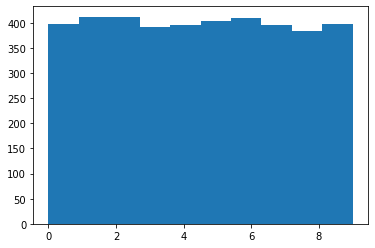

In [ ]:
YtrainInt.hist(grid=False)

We will change the format of our train test values from pandas to numpy

In [ ]:
Xtrain=Xtrain.to_numpy()
Xtest=Xtest.to_numpy()
YtrainInt=YtrainInt.to_numpy()
YtestInt=YtestInt.to_numpy()

We will need to transform our Y from an array containing values from 0 to 9 to an array with 10 columns, containing 1 at the index of the corresponding digit example and implementation below:

In [ ]:
YtrainBin = np.zeros((YtrainInt.shape[0], 10), dtype=int)
YtestBin = np.zeros((YtestInt.shape[0], 10), dtype=int)

for i in range (len(YtrainBin)):
    YtrainBin[i, YtrainInt[i]]=1

for i in range (len(YtestBin)):
    YtestBin[i, YtestInt[i]]=1

print(YtrainBin[0:2])
print(YtrainInt[0:2])
print(np.shape(YtestBin))
print(np.shape(YtrainBin))
print(np.shape(Xtest))
print(np.shape(Xtrain))


[[0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]]
[8 2]
(1000, 10)
(3999, 10)
(1000, 400)
(3999, 400)


# 2. Function Definition
## 2.1. Sigmoid functions


In [ ]:
def sigmoid(x) :
    result =  1/(1+np.exp(-x))
    return result

## 2.2. Forward Propagation Function

In [ ]:
def forwardPropagation():
    #a1=Xtrain With bias.T
    z2=W1.dot(XtrainWbias.T) #W1.a1
    a2=sigmoid(z2)
    a2Wbias=np.append(np.ones((1,len(YtrainBin)),dtype=float),a2, axis=0) #we simply fuse a2 with an array of 1s


    z3=W2.dot(a2Wbias)  #W2a2
    a3=sigmoid(z3)
    a3Wbias=np.append(np.ones((1,len(YtrainBin)),dtype=float),a3, axis=0) #fuse a3 with array of 1


    z4=W3.dot(a3Wbias)
    a4=sigmoid(z4) 
    return z2, a2Wbias, z3, a3Wbias, z4, a4

In [ ]:
def forwardPropagation1layer():
    #a1=Xtrain With bias.T
    z2=W1.dot(XtrainWbias.T) #W1.a1
    a2=sigmoid(z2)
    a2Wbias=np.append(np.ones((1,len(YtrainBin)),dtype=float),a2, axis=0) #we simply fuse a2 with an array of 1s


    z3=W2.dot(a2Wbias)  #W2a2
    a3=sigmoid(z3)
   

    return z2, a2Wbias, z3, a3

## 2.3. Backward Propagation Function  
After some tests, we figured out that we shall remove bias from delta3 otherwise our computation for delta2 won't be correct

In [ ]:
def backwardPropagation():
    delta4= a4-YtrainBin.T
    delta3 = np.multiply(W3.T.dot(delta4),np.multiply(a3Wbias, 1-a3Wbias))
    delta2=np.multiply(W2.T.dot(delta3[1:,]), np.multiply(a2Wbias,1-a2Wbias))
    return delta2, delta3, delta4

In [ ]:
def backwardPropagation1layer():
    delta3 = a3-YtrainBin.T
    delta2 = np.multiply(W2.T.dot(delta3), np.multiply(a2Wbias,1-a2Wbias))
    return delta2, delta3

## 2.4. Accuracy Function

In [ ]:
def accuracy(a, y):

    #correct= np.sum(a4 == y)
    #print("Number of correct predictions= ", correct)
    #return correct/a4.shape[0]
    result=0
    for i in range(len(a)):
        if (np.argmax(a[i])==np.argmax(y[i])):
            result+=1
    print("Number of correct predictions= ", result)
    return (result/len(a))*100

## 2.5. Log Functions

In [ ]:
def tweakedLog(x):
    x[x<0]=0.00001
    result=x
    for i in range(len(x)):
        if x[i]>0:
            result[i]=np.log(x[i])
        else:
            result[i]==1
    return result

## 2.6. Cost Function

In [ ]:
def cost(Y, a):
    cost=0

    #mycoststock=np.array([0])
    #for i in range(len(Y)):
      #  np.append(mycoststock, (-( Y[i].dot(logByColumn(a4[:, i])) + (1-Y[i].dot(logByColumn(1-a4[:, i])))  )) )
    #mycost=np.sum(mycost)

    for i in range(len(Y)):

        cost = cost -( Y[i].dot(tweakedLog(a[:, i])) + (1-Y[i].dot(tweakedLog(1-a[:, i])))  )
    
    cost += (np.sum(W1*W1)+np.sum(W2*W2)+np.sum(W3*W3))*(1/2)
    print("cost= ",cost)

    #print("mycost=",mycost)
    return cost

In [ ]:
def cost1layer(Y, a):
    cost=0

    #mycoststock=np.array([0])
    #for i in range(len(Y)):
      #  np.append(mycoststock, (-( Y[i].dot(logByColumn(a4[:, i])) + (1-Y[i].dot(logByColumn(1-a4[:, i])))  )) )
    #mycost=np.sum(mycost)

    for i in range(len(Y)):

        cost = cost -( Y[i].dot(tweakedLog(a[:, i])) + (1-Y[i].dot(tweakedLog(1-a[:, i])))  )
    
    cost += (np.sum(W1*W1)+np.sum(W2*W2))*(1/2)
    print("cost= ",cost)

    #print("mycost=",mycost)
    return cost

# 3. Implementation of the Feed-Forward Neural Network
we defined our layers as follows:

s1 = 400 (input layer)  
s2 = 276 (hidden layer 1)  
s3 = 276 (hidden layer 2)  
s4 = 10 (output layer)

We chose 400 for both hidden layers because it should be between the size of the input layer and the size of the output layer. We decided to choose 2/3 of the total number of inputs which is 266 and add 10, the size of the output layer, so 276.


## 3.1. Initialization of our FFNN

In [ ]:
# Neurons at each layer
s1 = 400 # 400 units per layer for the features
s2 = 276
s3 = 276
s4 = 10 # 10 possible outputs

# Gradient matrix 
Delta1 = np.zeros((s2,s1+1))
Delta2 = np.zeros((s4,s2+1))
Delta3 = np.zeros((s4,s3+1))

# weight matrices From one layer Wi to Wi+1
W1 = np.random.random((s2, s1+1))-0.5 
W2 = np.random.random((s3, s2+1))-0.5 
W3 = np.random.random((s4, s3+1))-0.5
# Add bias unit
XtrainWbias = np.append(np.ones((len(YtrainBin),1),dtype=float),Xtrain, axis=1)
XtestWbias = np.append(np.ones((len(YtestBin),1),dtype=float),Xtest, axis=1)

ntrain=len(YtrainBin)
print(ntrain)
ntest=len(YtestBin)
print(ntest)

3999
1000


In [ ]:
Cost=[]
Accuracy=[]

## 3.2. Our Neuron Network

In [ ]:
for i in range(2500): # We train 2500 epochs
    z2, a2Wbias, z3, a3Wbias, z4, a4 = forwardPropagation() 

    delta2, delta3, delta4 = backwardPropagation() 

    Delta_1 = delta2[1:,].dot(XtrainWbias)
    Delta_2 = delta3[1:,].dot(a2Wbias.T)
    Delta_3 = delta4.dot(a3Wbias.T)

    W1=W1-learning_rate*Delta_1
    W2=W2-learning_rate*Delta_2
    W3=W3-learning_rate*Delta_3

    Accuracy.append(accuracy(a4.T, YtrainBin))
    print("Iteration n°=",i)
    Cost.append(cost(YtrainBin, a4))

Number of correct predictions=  3719
Iteration n°= 2167
cost=  6329.132790747639
Number of correct predictions=  3719
Iteration n°= 2168
cost=  6328.71056592595
Number of correct predictions=  3719
Iteration n°= 2169
cost=  6328.2886034512885
Number of correct predictions=  3719
Iteration n°= 2170
cost=  6327.866903015493
Number of correct predictions=  3719
Iteration n°= 2171
cost=  6327.44546431092
Number of correct predictions=  3719
Iteration n°= 2172
cost=  6327.024287030433
Number of correct predictions=  3719
Iteration n°= 2173
cost=  6326.603370867388
Number of correct predictions=  3719
Iteration n°= 2174
cost=  6326.182715515653
Number of correct predictions=  3719
Iteration n°= 2175
cost=  6325.762320669606
Number of correct predictions=  3719
Iteration n°= 2176
cost=  6325.342186024094
Number of correct predictions=  3719
Iteration n°= 2177
cost=  6324.922311274516
Number of correct predictions=  3719
Iteration n°= 2178
cost=  6324.50269611673
Number of correct predictions=

# 3.3. Results of our FFNN

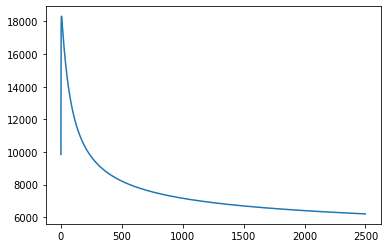

In [ ]:
plt.plot(Cost)

In [ ]:
print("Xtrain with bias.shape= ",XtrainWbias.shape)
print("z2.shape= ", z2.shape)
print("a2_with_bias.shape= ", a2Wbias.shape)
print("z3.shape= ", z3.shape)
print("a3_with_bias.shape= ", a3Wbias.shape)
print("z4.shape= ", z4.shape)
print("a4= ", a4.shape)

Xtrain with bias.shape=  (3999, 401)
z2.shape=  (276, 3999)
a2_with_bias.shape=  (277, 3999)
z3.shape=  (276, 3999)
a3_with_bias.shape=  (277, 3999)
z4.shape=  (10, 3999)
a4=  (10, 3999)


We apply the result of our neural network to our test set:

In [ ]:
z2=W1.dot(XtestWbias.T)
a2=sigmoid(z2)
a2Wbias=np.append(np.ones((1,len(YtestBin)),dtype=float),a2, axis=0)
z3=W2.dot(a2Wbias)
a3=sigmoid(z3)
a3Wbias=np.append(np.ones((1,len(YtestBin)),dtype=float),a3, axis=0)
z4=W3.dot(a3Wbias)
a4=sigmoid(z4)

In [ ]:
print("accuracy on test data= ", accuracy(a4.T, YtestBin) )
print("accuracy on train data= ", Accuracy[-1])

Number of correct predictions=  901
accuracy on test data=  90.10000000000001
accuracy on train data=  93.47336834208552


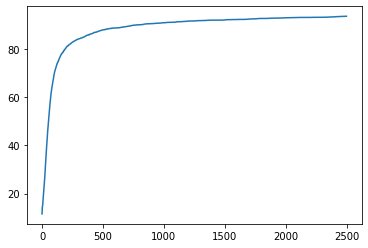

In [ ]:
plt.plot(Accuracy)

## 3.4. FFNN with only 1 hidden layer

In [ ]:
# Neurons at each layer
s1 = 400 # 400 units per layer for the features
s2 = 276
s3 = 10 # 10 possible outputs

# Gradient matrix 
Delta1 = np.zeros((s2,s1+1))
Delta2 = np.zeros((s3,s2+1))

# weight matrices From one layer Wi to Wi+1
W1 = np.random.random((s2, s1+1))-0.5 
W2 = np.random.random((s3, s2+1))-0.5
# Add bias unit
XtrainWbias = np.append(np.ones((len(YtrainBin),1),dtype=float),Xtrain, axis=1)
XtestWbias = np.append(np.ones((len(YtestBin),1),dtype=float),Xtest, axis=1)

ntrain=len(YtrainBin)
print(ntrain)
ntest=len(YtestBin)
print(ntest)

3999
1000


In [ ]:
Cost1layer=[]
Accuracy1layer=[]

In [ ]:
for i in range(2500): # We train 2500 epochs
    z2, a2Wbias, z3, a3 = forwardPropagation1layer() 

    delta2, delta3 = backwardPropagation1layer() 

    Delta_1 = delta2[1:,].dot(XtrainWbias)
    Delta_2 = delta3.dot(a2Wbias.T)

    W1=W1-learning_rate*Delta_1
    W2=W2-learning_rate*Delta_2

    Accuracy1layer.append(accuracy(a3.T, YtrainBin))
    print("Iteration n°=",i)
    Cost1layer.append(cost1layer(YtrainBin, a3))

Number of correct predictions=  3659
Iteration n°= 2167
cost=  3462.6494868318296
Number of correct predictions=  3659
Iteration n°= 2168
cost=  3462.2778763142846
Number of correct predictions=  3659
Iteration n°= 2169
cost=  3461.9064991976957
Number of correct predictions=  3659
Iteration n°= 2170
cost=  3461.535355208915
Number of correct predictions=  3659
Iteration n°= 2171
cost=  3461.1644440752716
Number of correct predictions=  3659
Iteration n°= 2172
cost=  3460.7937655244987
Number of correct predictions=  3659
Iteration n°= 2173
cost=  3460.423319284807
Number of correct predictions=  3659
Iteration n°= 2174
cost=  3460.053105084853
Number of correct predictions=  3659
Iteration n°= 2175
cost=  3459.6831226537124
Number of correct predictions=  3659
Iteration n°= 2176
cost=  3459.3133717209257
Number of correct predictions=  3659
Iteration n°= 2177
cost=  3458.9438520164695
Number of correct predictions=  3660
Iteration n°= 2178
cost=  3458.5745632707517
Number of correct p

## 3.5. Results of the FFNN with only 1 hidden layer

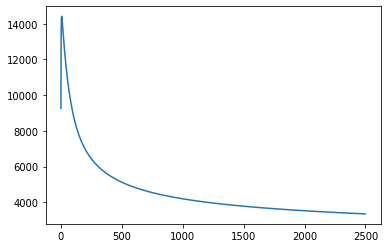

In [ ]:
plt.plot(Cost1layer)

In [ ]:
print("Xtrain with bias.shape= ",XtrainWbias.shape)
print("z2.shape= ", z2.shape)
print("a2_with_bias.shape= ", a2Wbias.shape)
print("z3.shape= ", z3.shape)

Xtrain with bias.shape=  (3999, 401)
z2.shape=  (276, 3999)
a2_with_bias.shape=  (277, 3999)
z3.shape=  (10, 3999)


In [ ]:
z2=W1.dot(XtestWbias.T)
a2=sigmoid(z2)
a2Wbias=np.append(np.ones((1,len(YtestBin)),dtype=float),a2, axis=0)
z3=W2.dot(a2Wbias)
a3=sigmoid(z3)


In [ ]:
print("accuracy on test data= ", accuracy(a3.T, YtestBin) )
print("accuracy on train data= ", Accuracy1layer[-1])

Number of correct predictions=  891
accuracy on test data=  89.1
accuracy on train data=  91.9229807451863


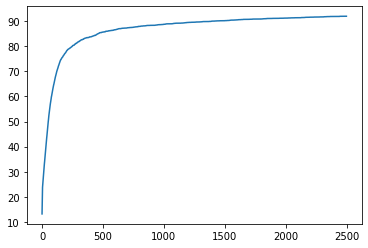

In [ ]:
plt.plot(Accuracy1layer)

# 4. Comparison with Keras

In [ ]:
model = Sequential()
model.add(Dense(276, input_dim=400, activation='sigmoid'))
model.add(Dense(276, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(Xtrain, YtrainBin, epochs=2500, batch_size=276)

scores = model.evaluate(Xtest, YtestBin)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 2003/2500
15/15 [==============================] - 0s 7ms/step - loss: 2.0781 - categorical_accuracy: 0.6960
Epoch 2004/2500
15/15 [==============================] - 0s 7ms/step - loss: 2.0766 - categorical_accuracy: 0.7013
Epoch 2005/2500
15/15 [==============================] - 0s 7ms/step - loss: 2.0772 - categorical_accuracy: 0.6977
Epoch 2006/2500
15/15 [==============================] - 0s 7ms/step - loss: 2.0815 - categorical_accuracy: 0.6864
Epoch 2007/2500
15/15 [==============================] - 0s 7ms/step - loss: 2.0793 - categorical_accuracy: 0.6965
Epoch 2008/2500
15/15 [==============================] - 0s 7ms/step - loss: 2.0804 - categorical_accuracy: 0.6859
Epoch 2009/2500
15/15 [==============================] - 0s 7ms/step - loss: 2.0775 - categorical_accuracy: 0.6995
Epoch 2010/2500
15/15 [==============================] - 0s 4ms/step - loss: 2.0753 - categorical_accuracy: 0.7034
Epoch 2011/2500
15/15 [==============================] - 0s 4ms/step - loss: 2.0

# Conclusion
With our three ways of implementing we saw that:

-Two hidden layers worked better than one 89% vs 91% of accuracy  
-Keras results were lower than ours, it migh be due to the settings but the difference is stil quite huge (68.2% vs 91%)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ed6b7ae-2406-4749-b23e-cd3909d8f028' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>